<a href="https://colab.research.google.com/github/TripopN/DADS6003/blob/main/ml_6610422011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

## Import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score

## Import data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/TripopN/DADS6003/5abdabf07e72e8376cdbc970398e5fe6416d4f84/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Data review

In [5]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (tot

## Check for null in dataframe

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Clean, edit data

### Replace YES/NO with 0 or 1

In [7]:
df2 = df.copy()

In [8]:
df2 = df2.replace({"mainroad":{"yes": 1,"no":0},
                 "guestroom":{"yes": 1,"no":0},
                 "basement":{"yes": 1,"no":0},
                 "hotwaterheating":{"yes": 1,"no":0},
                 "airconditioning":{"yes": 1,"no":0},
                 "prefarea":{"yes": 1,"no":0},
                 })
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


### Seperate furnishing status into 3 column and replace True/False with 1 and 0.

In [9]:
df2 = pd.get_dummies(df2,columns=["furnishingstatus"],drop_first=False)

In [10]:
df2 = df2.replace({"furnishingstatus_furnished":{True: 1,False:0},
                 "furnishingstatus_semi-furnished":{True: 1,False:0},
                 "furnishingstatus_unfurnished":{True: 1,False:0},
                 })

In [11]:
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


## Plot graph to see relationship between each variable and price.

In [12]:
X = df2.iloc[:, 1:15]
y = df2.iloc[:, 0]

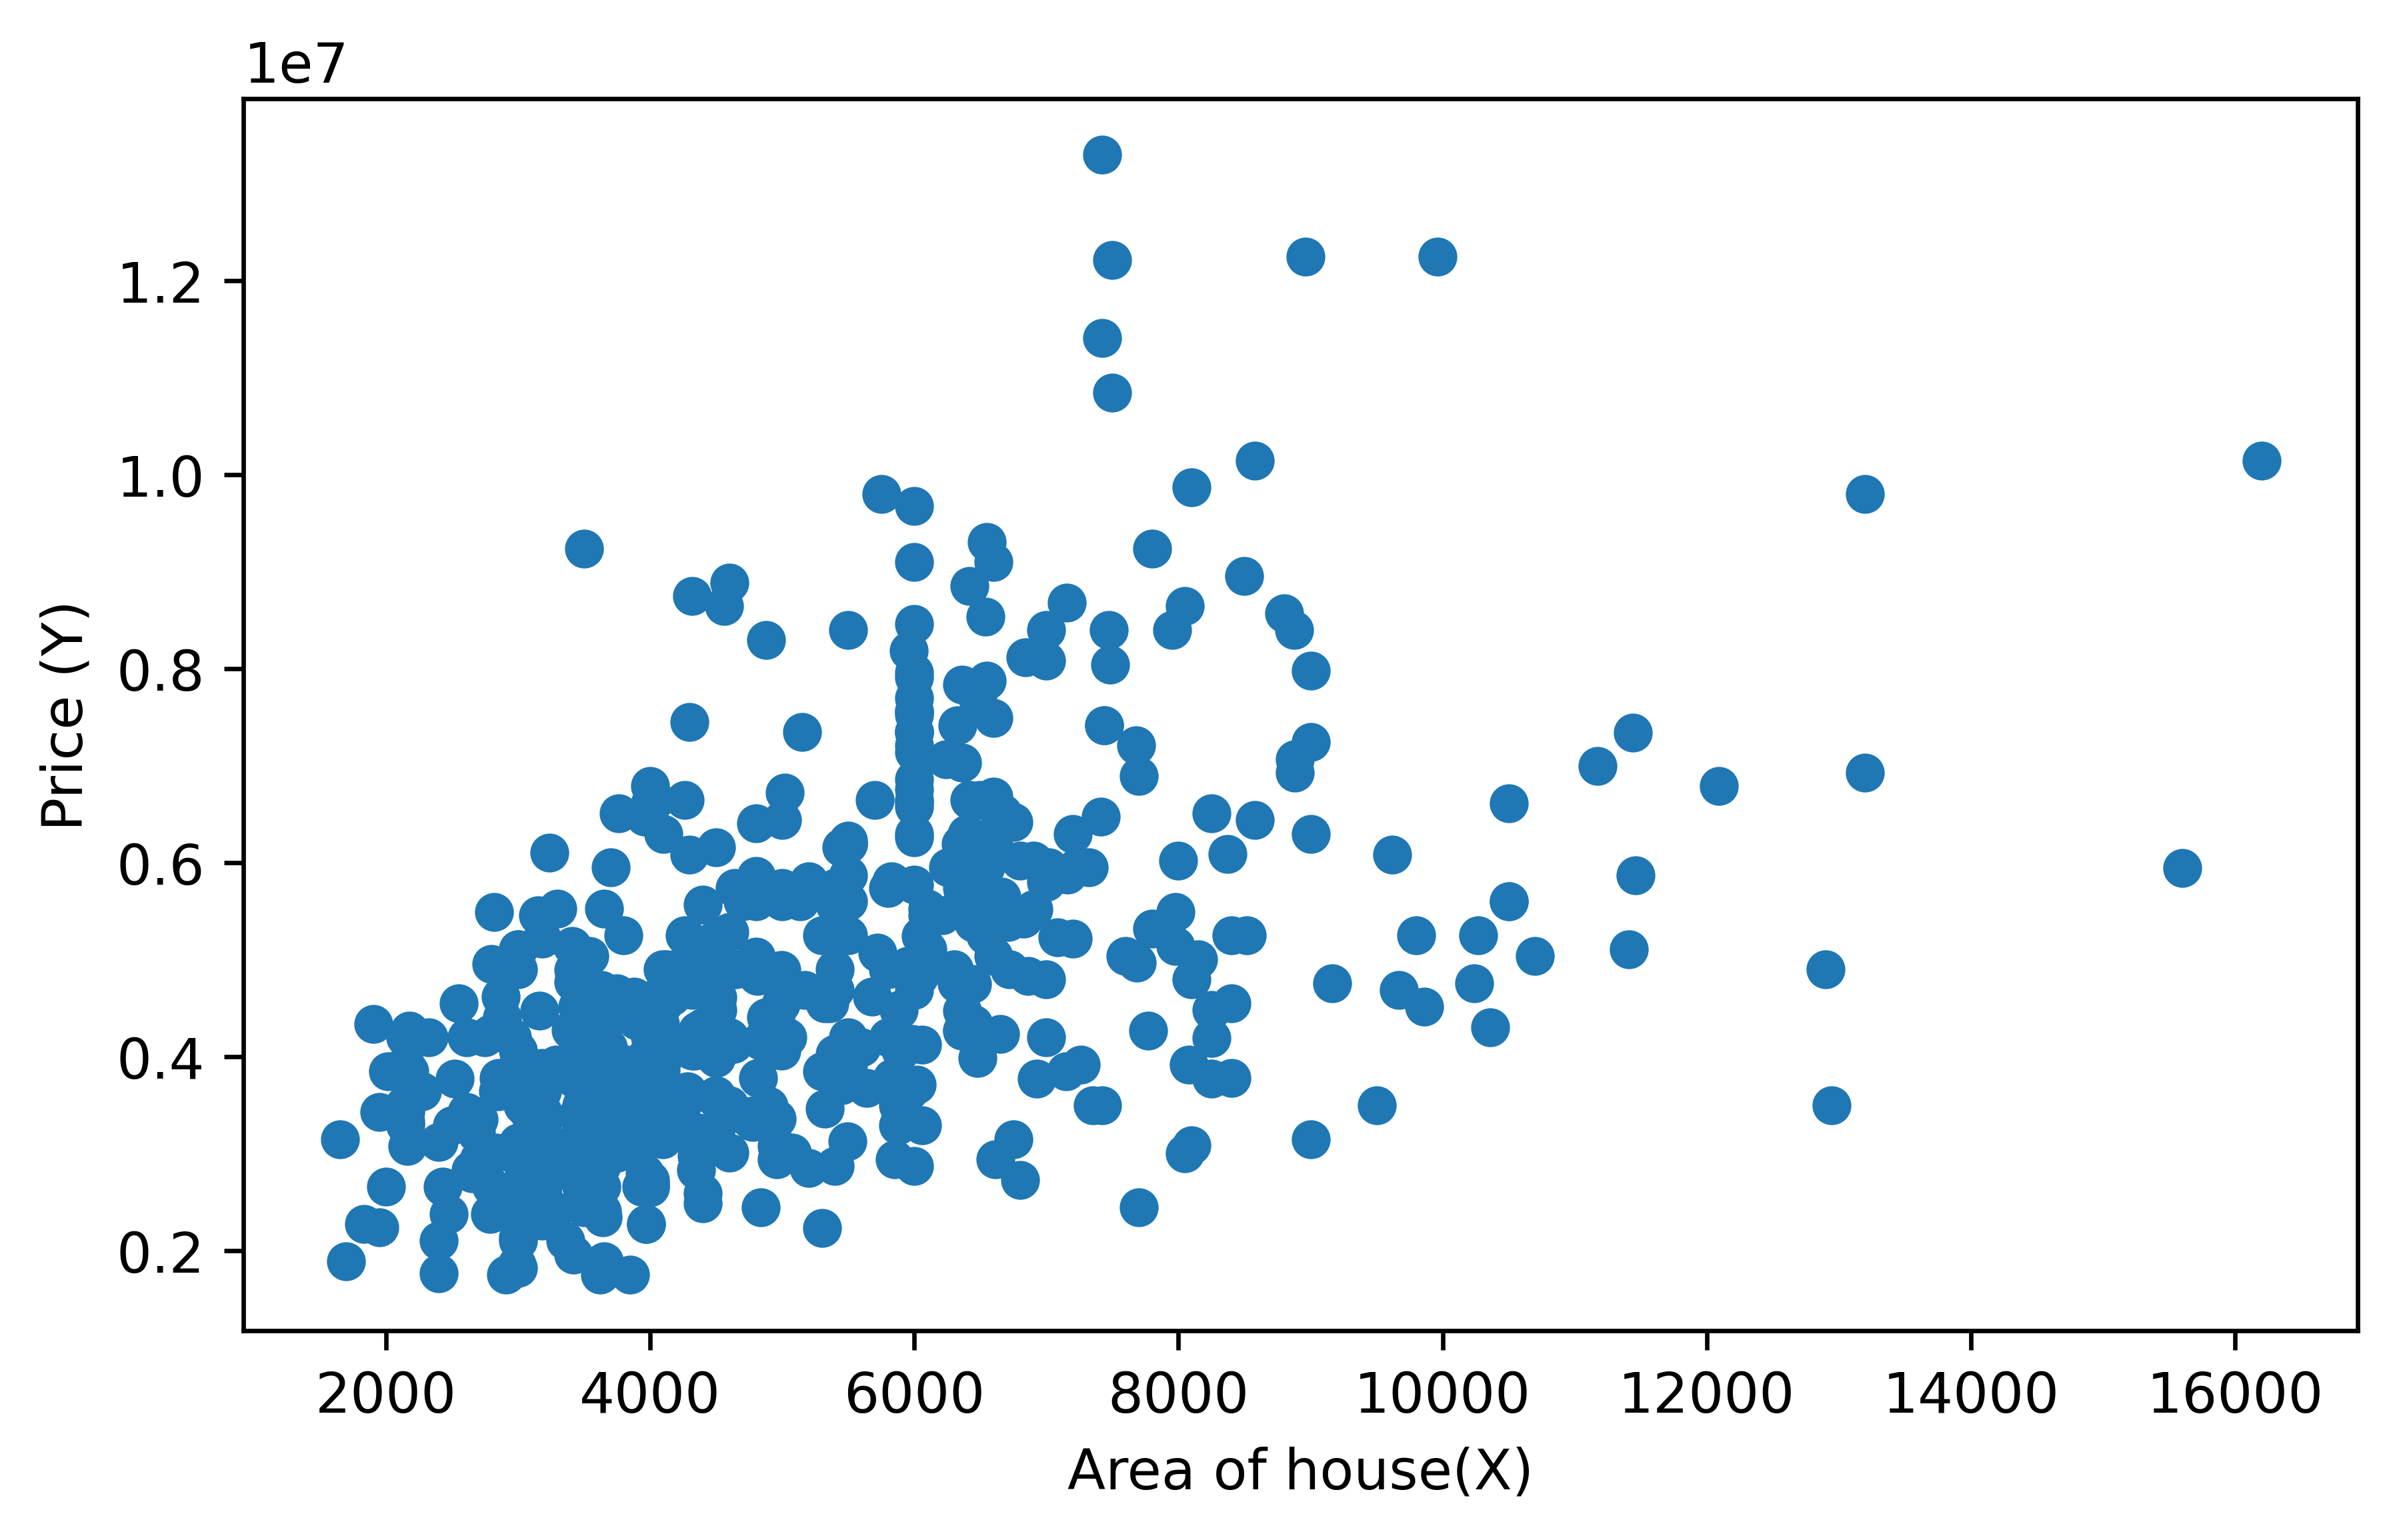

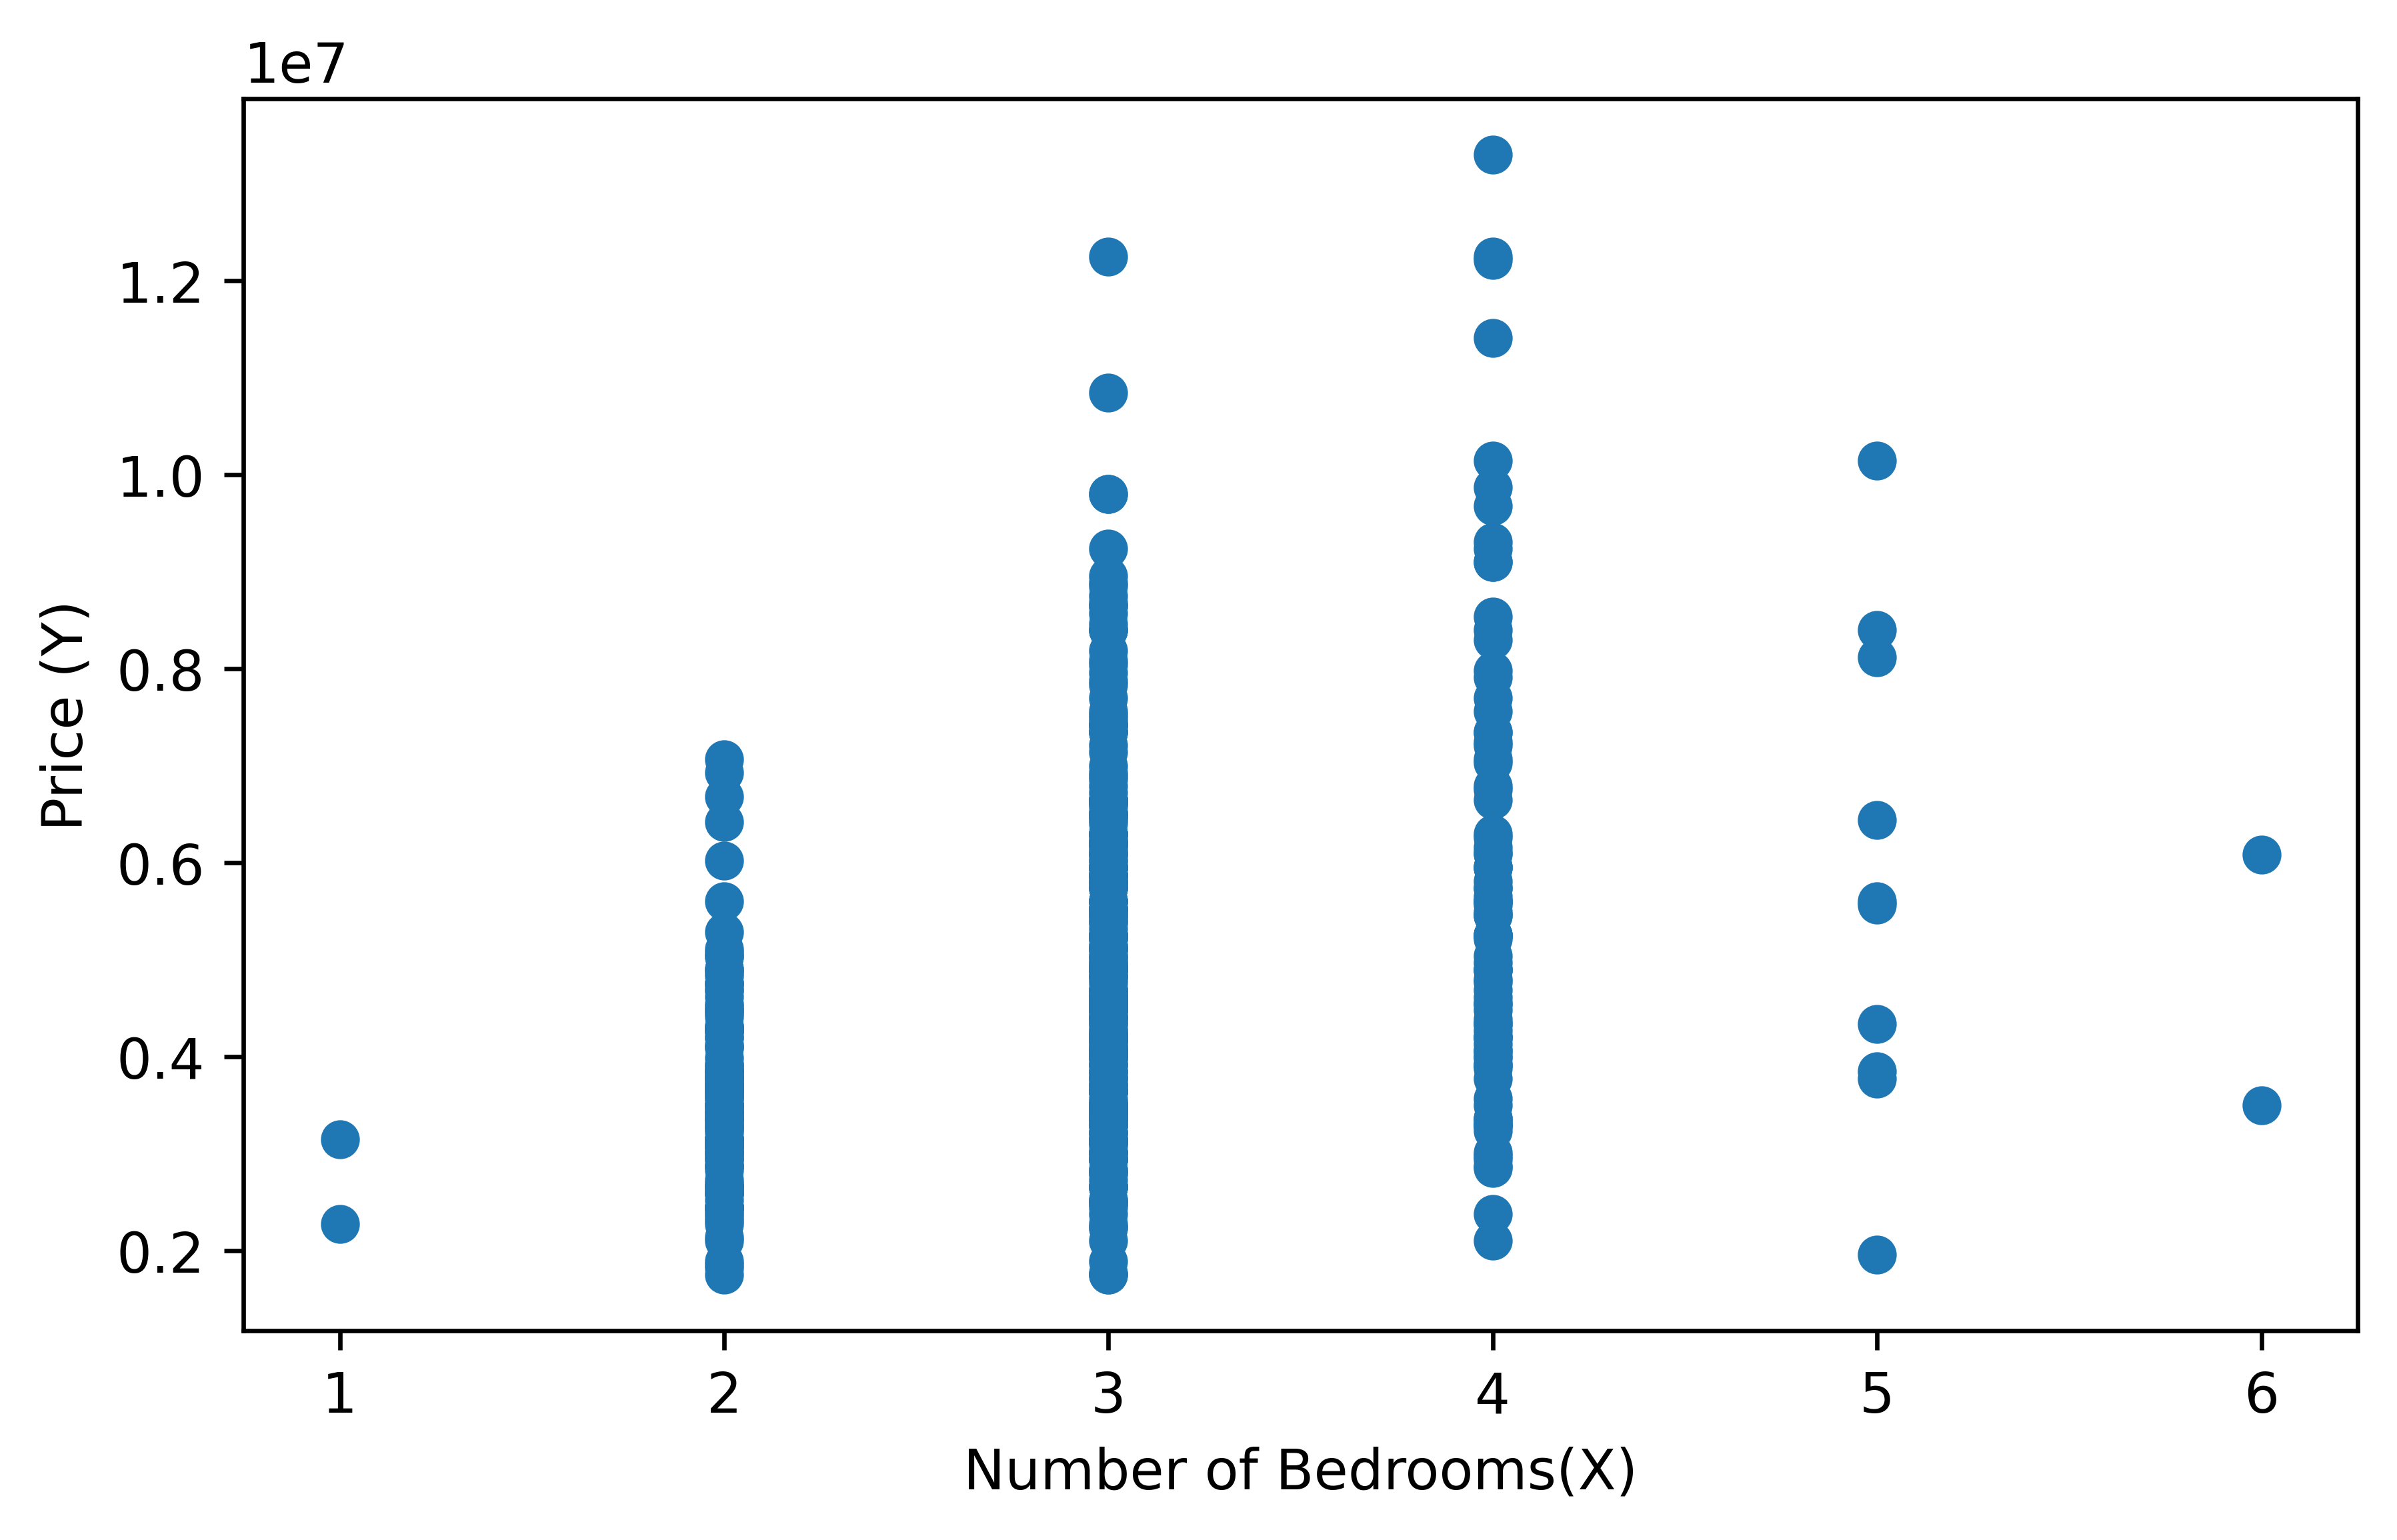

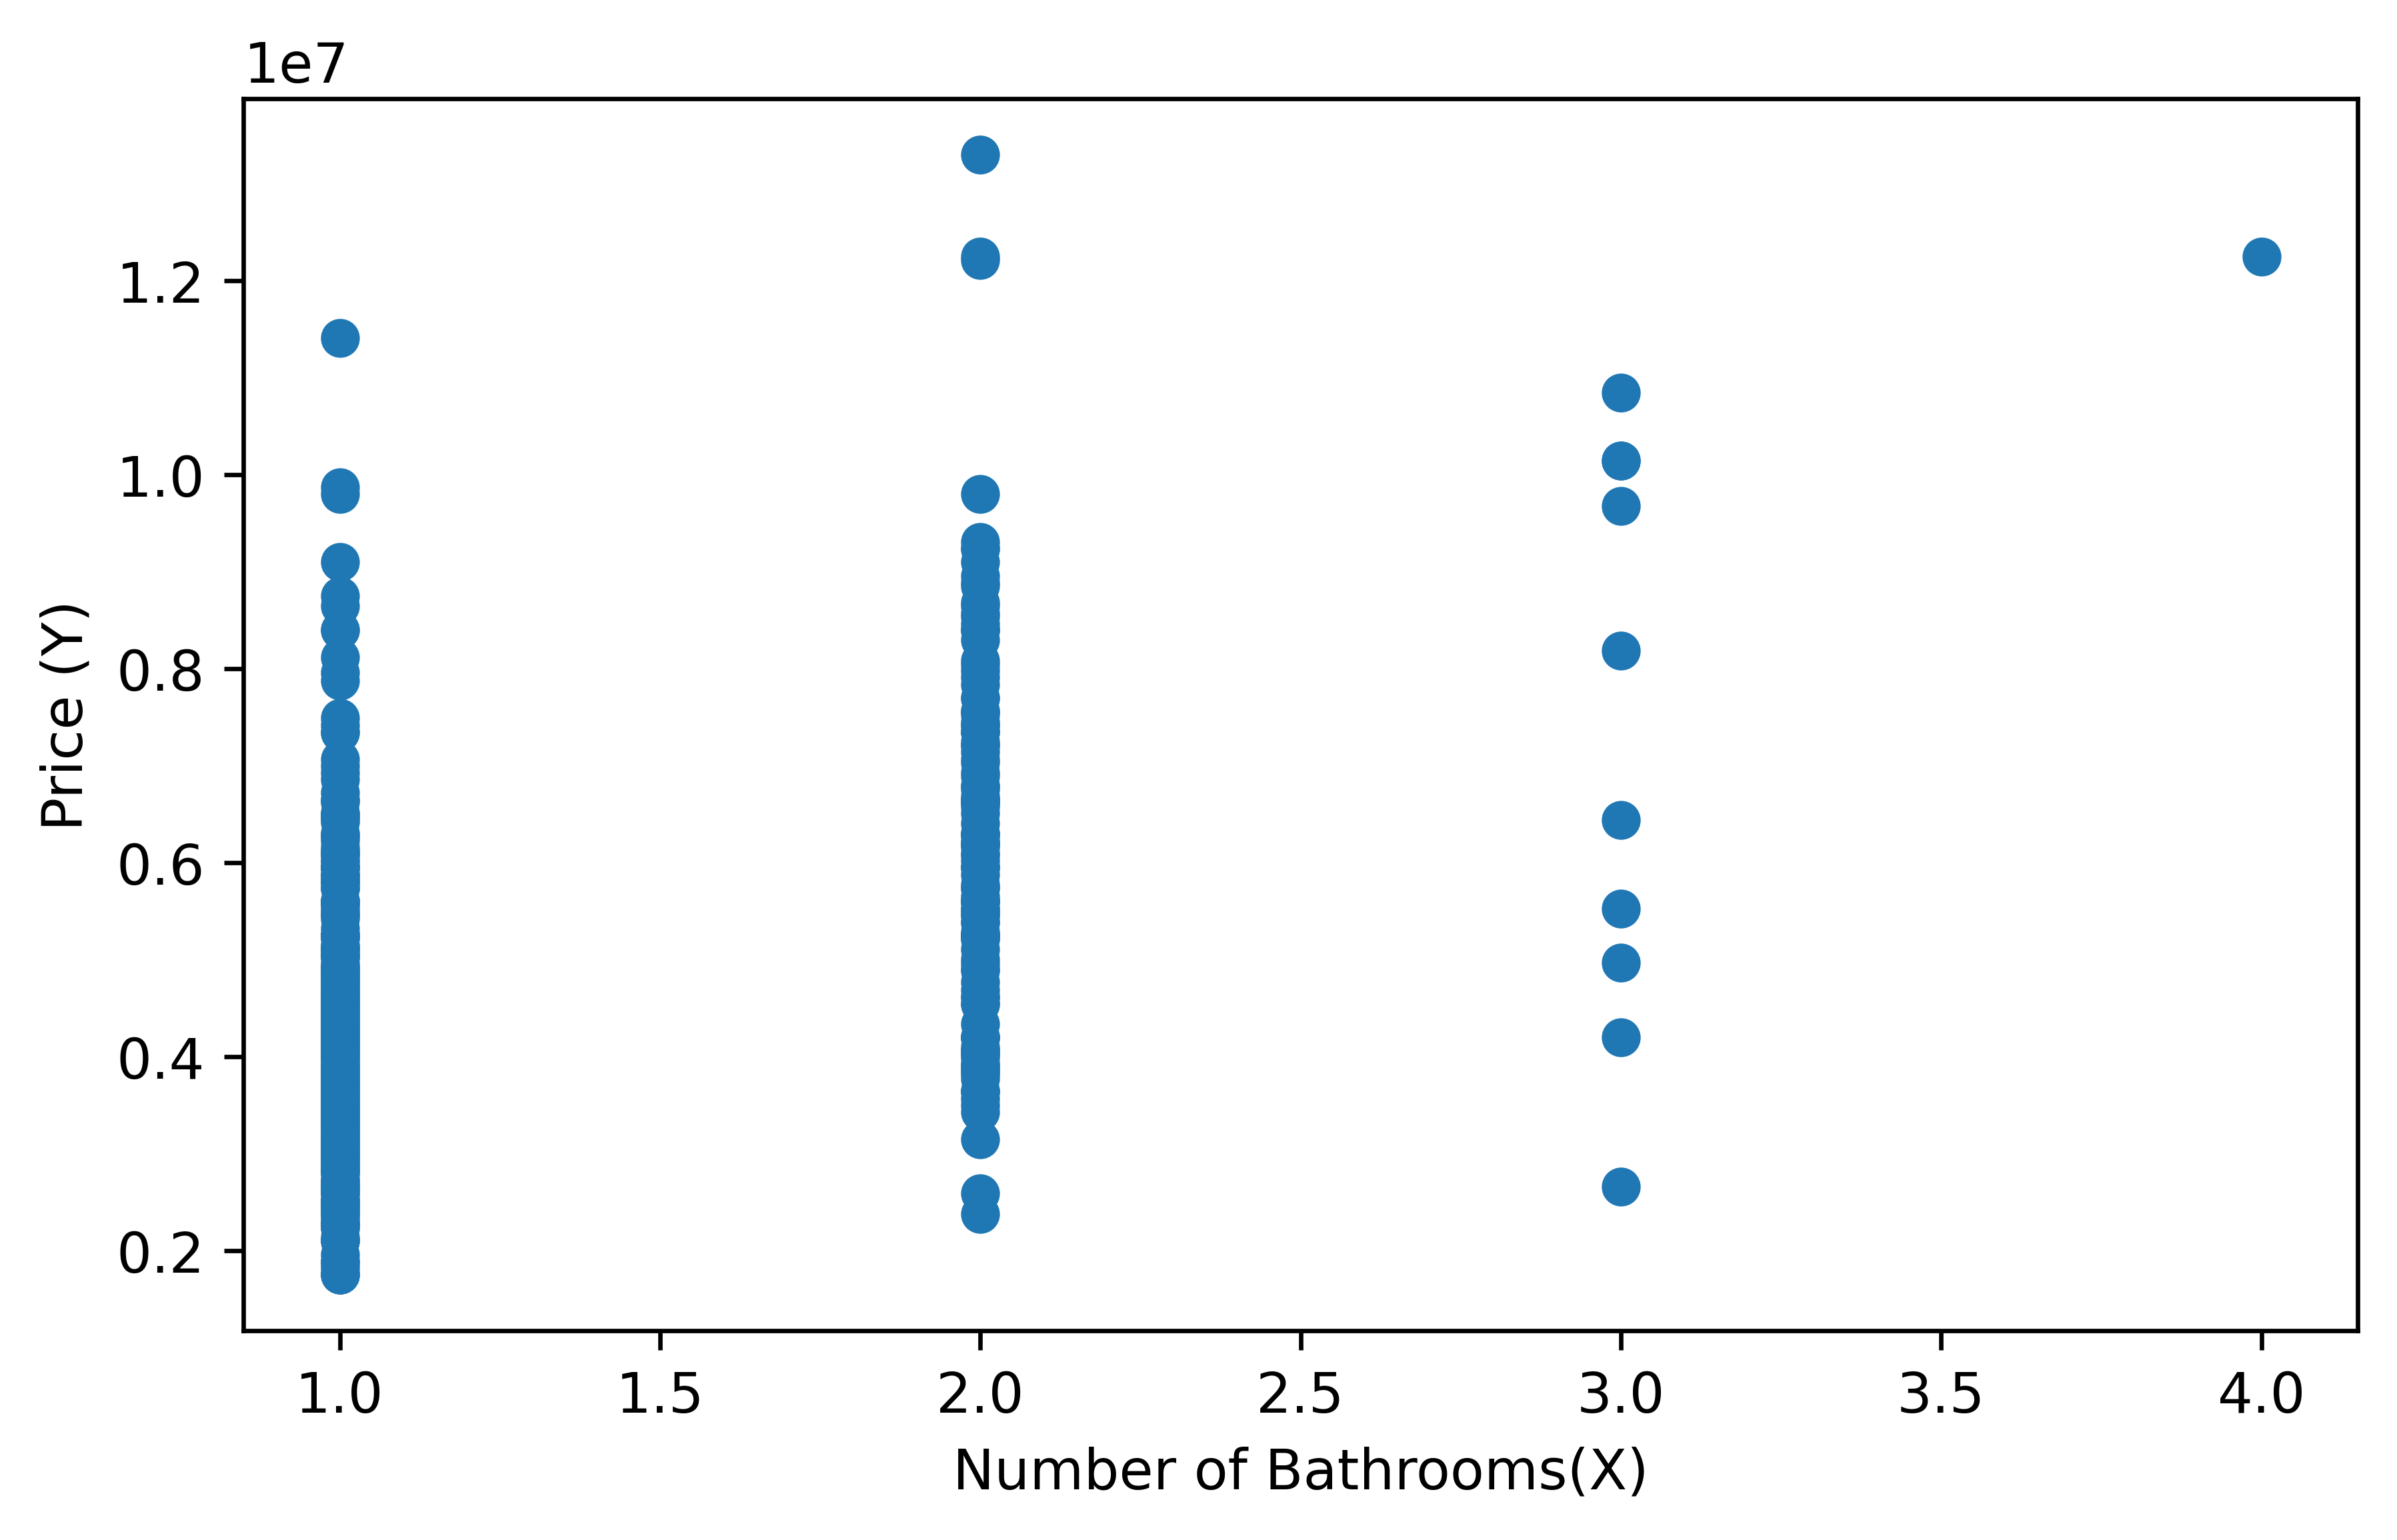

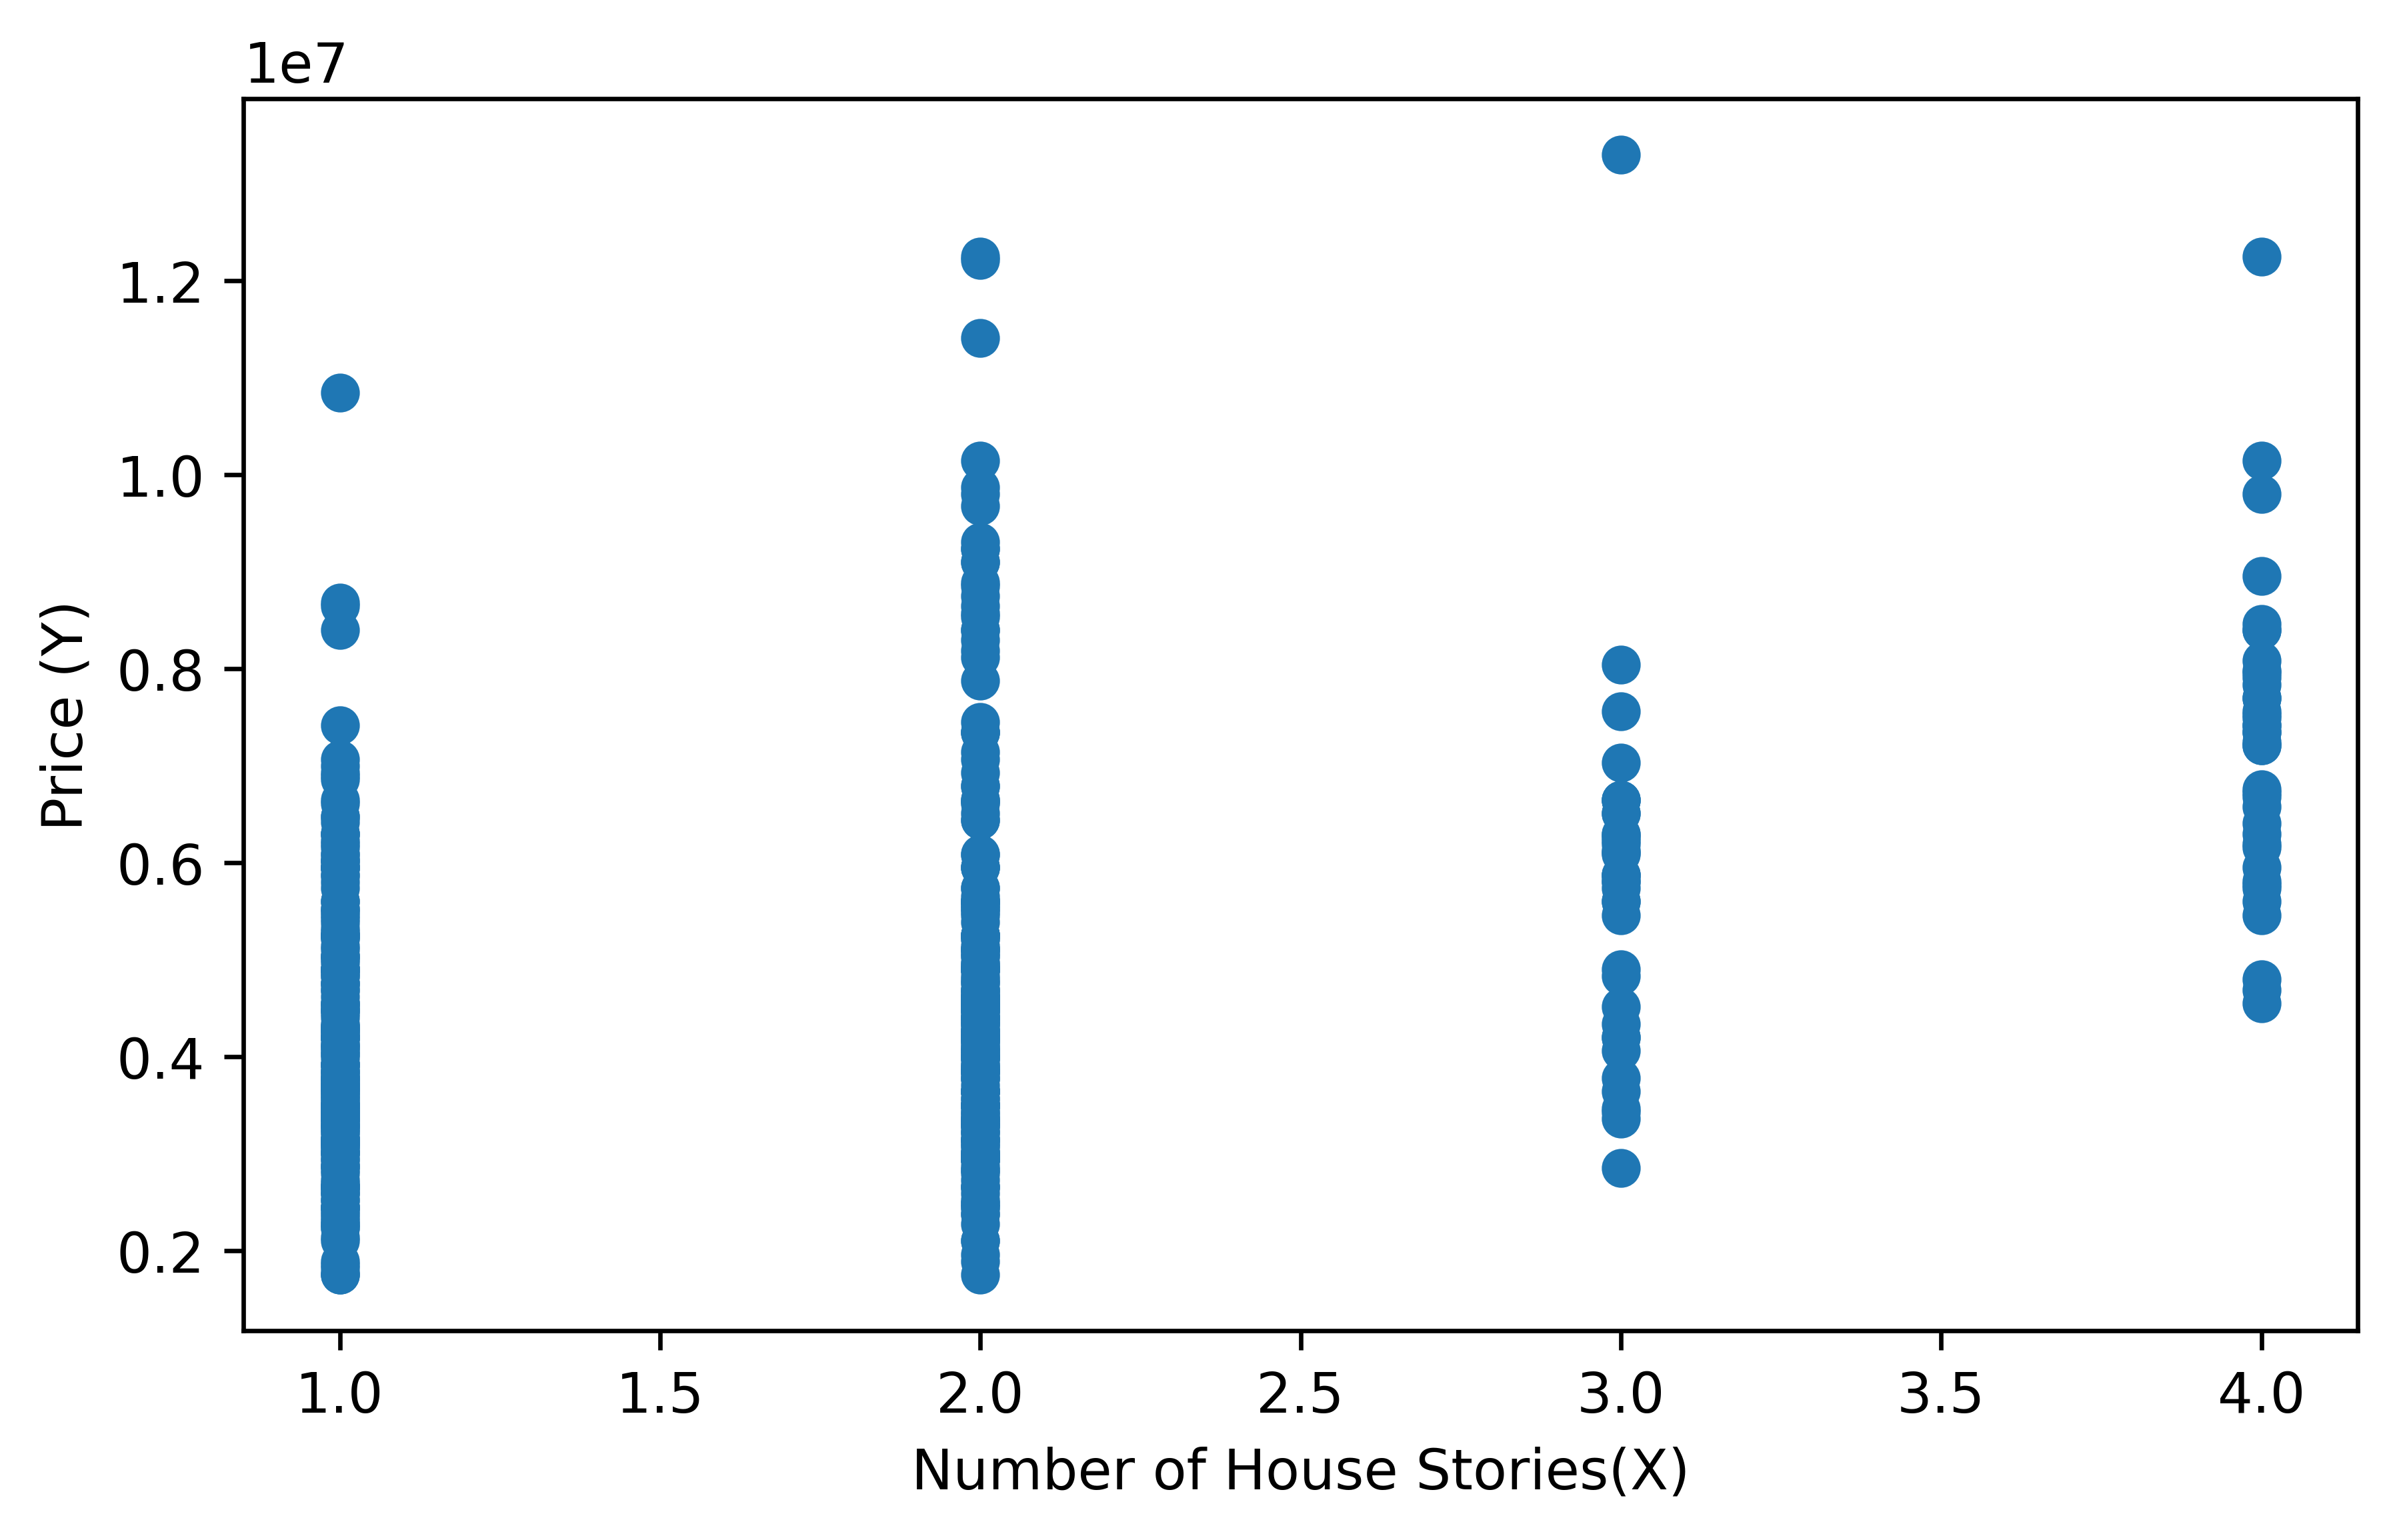

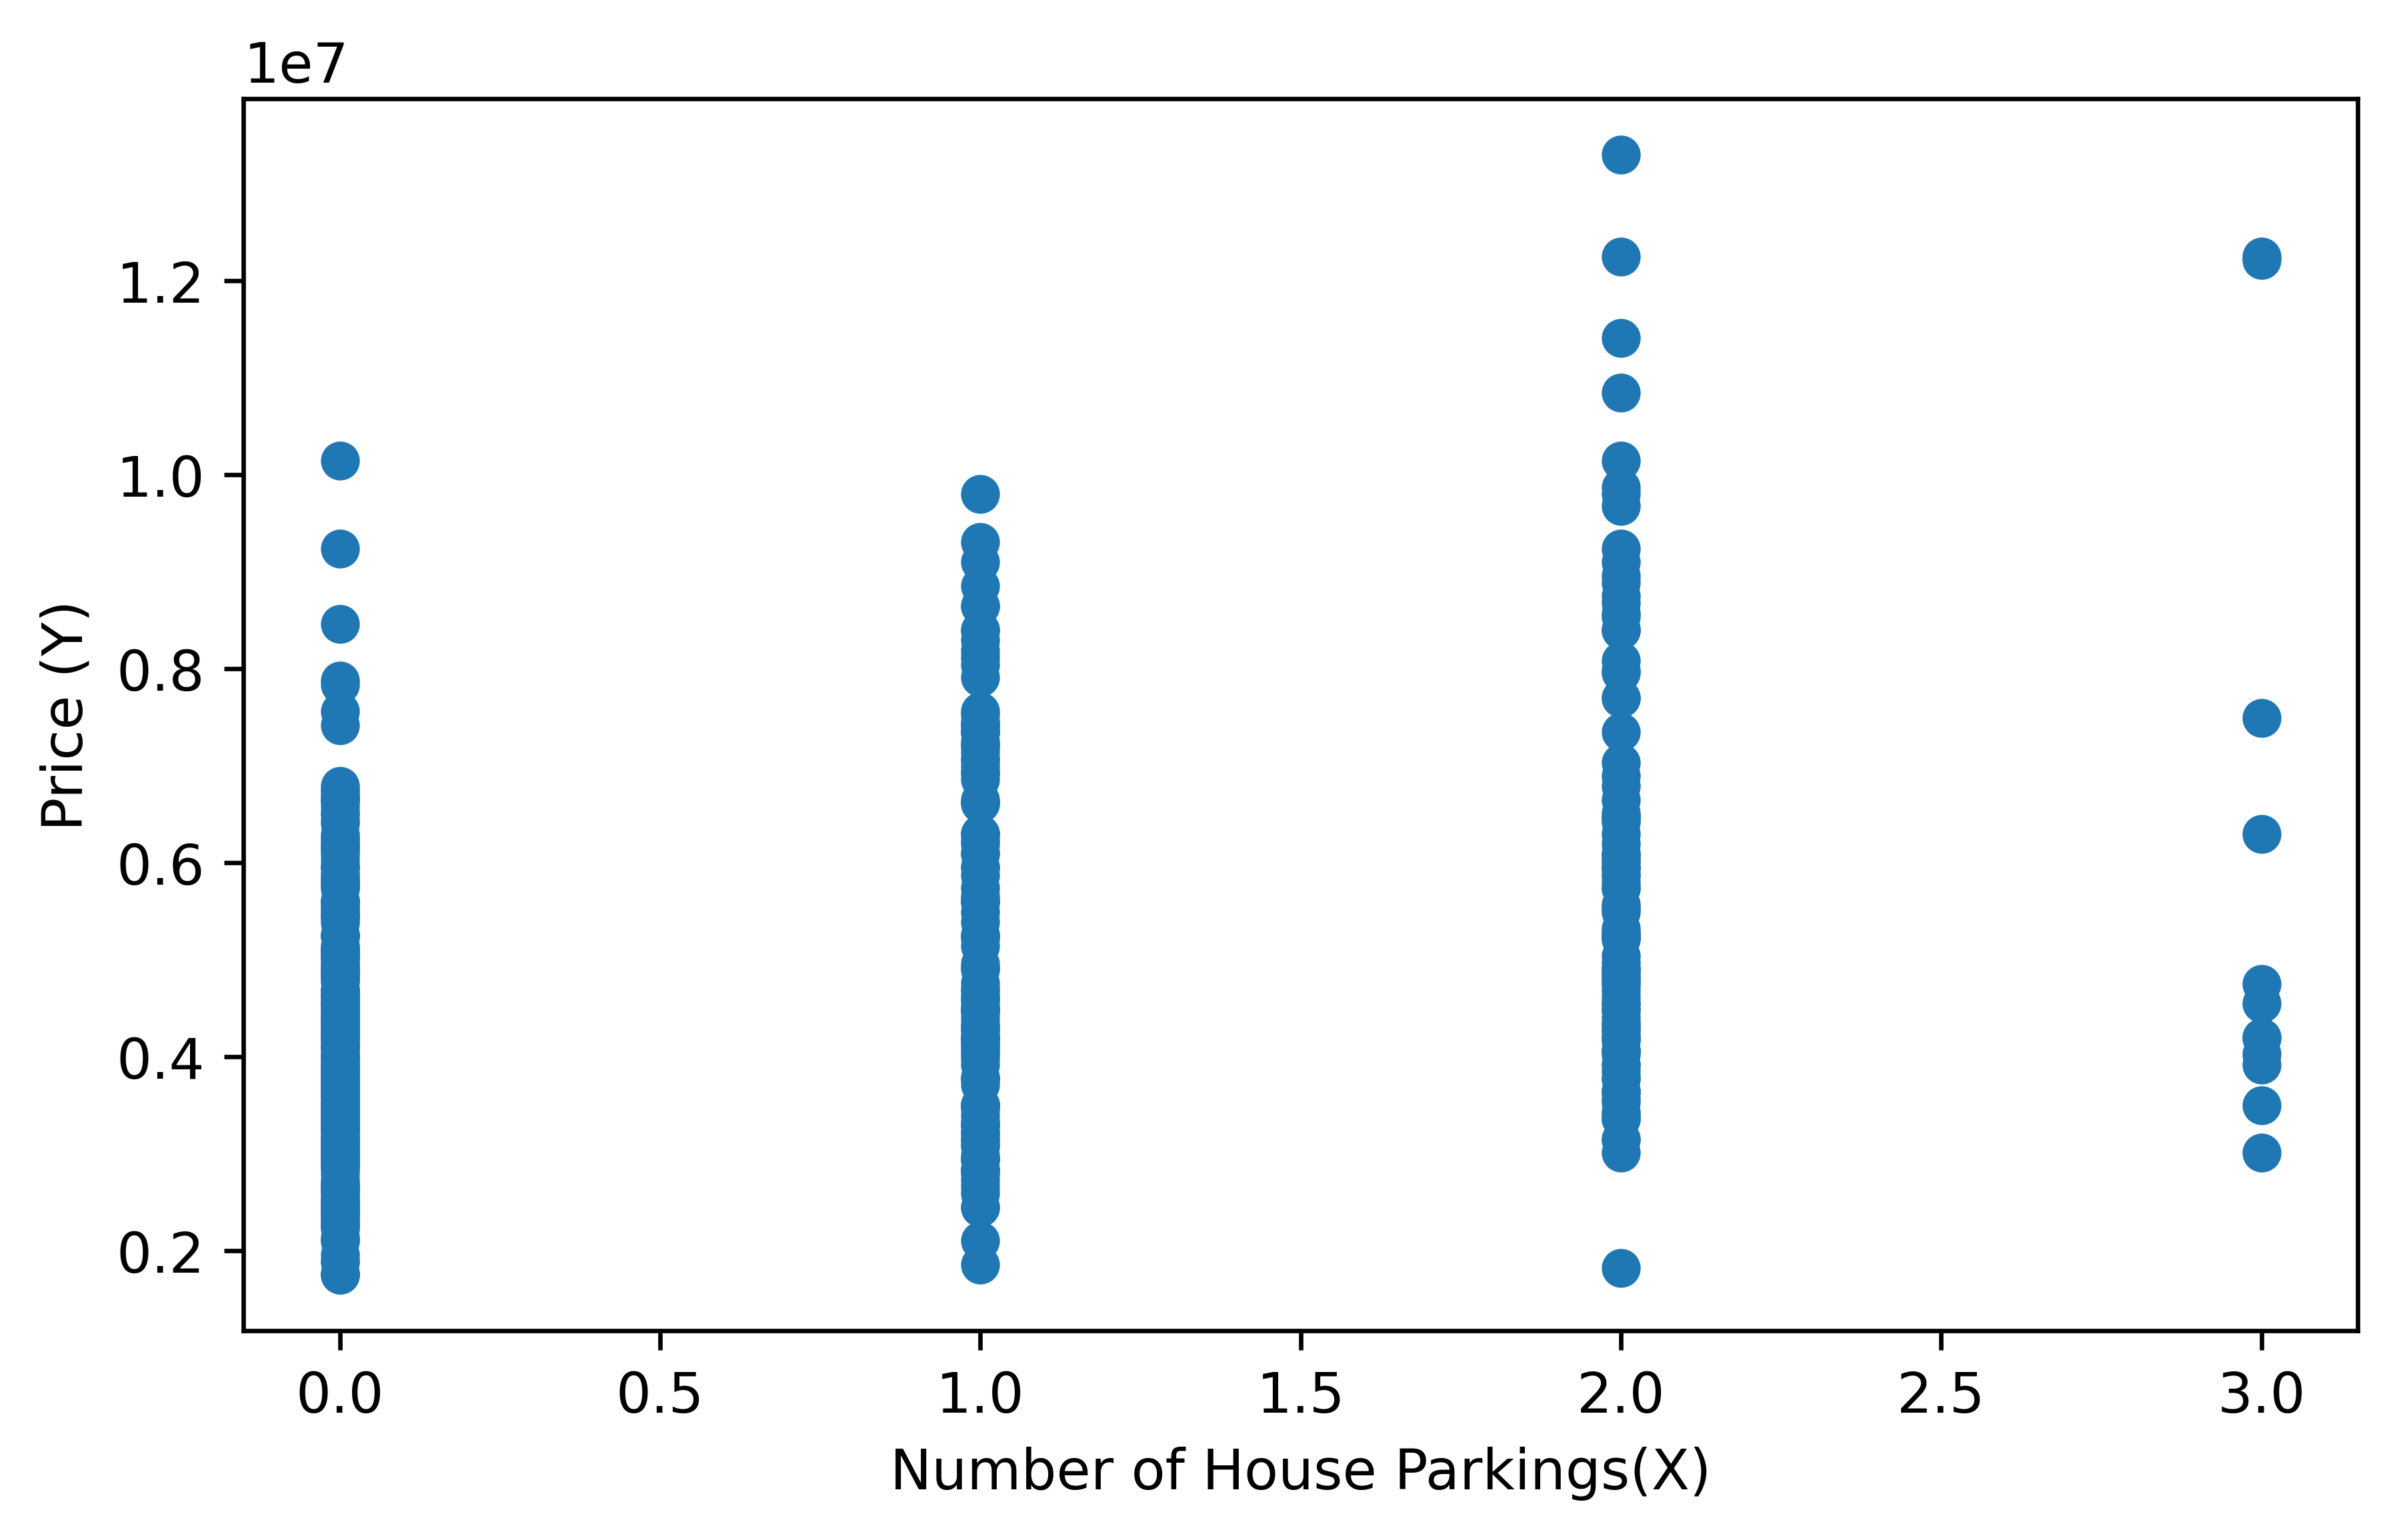

In [16]:
##area
plt.figure(figsize = (15,4), dpi=600)
plt.subplot(121)
plt.scatter(X.iloc[:,0],y)
plt.xlabel("Area of house(X)")
plt.ylabel("Price (Y)")

##bedrooms
plt.figure(figsize = (15,4), dpi=600)
plt.subplot(121)
plt.scatter(X.iloc[:,1],y)
plt.xlabel("Number of Bedrooms(X)")
plt.ylabel("Price (Y)")
##bathrooms
plt.figure(figsize = (15,4), dpi=600)
plt.subplot(121)
plt.scatter(X.iloc[:,2],y)
plt.xlabel("Number of Bathrooms(X)")
plt.ylabel("Price (Y)")
##stories
plt.figure(figsize = (15,4), dpi=600)
plt.subplot(121)
plt.scatter(X.iloc[:,3],y)
plt.xlabel("Number of House Stories(X)")
plt.ylabel("Price (Y)")

##mainroad
##guestroom
##basement
##hotwaterheating
##airconditioning

##parking
plt.figure(figsize = (15,4), dpi=600)
plt.subplot(121)
plt.scatter(X.iloc[:,9],y)
plt.xlabel("Number of House Parkings(X)")
plt.ylabel("Price (Y)")


## Multi variable regression

### Data split for train and test.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### f regression selection

In [19]:
selector = SelectKBest(f_regression,k='all')
selector.fit(X_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7f791f733be0>)

### Format to dataframe

In [20]:
freg_result = pd.DataFrame(selector.feature_names_in_, columns = ['Variable'])
freg_result['FScore'], freg_result['PValue'] = selector.scores_, selector.pvalues_
freg_result = freg_result.sort_values(by= ['FScore'], ascending= False)
freg_result

,Variable,FScore,PValue
0,area,186.308025,1.518128e-35
2,bathrooms,174.400808,1.042101e-33
8,airconditioning,113.929852,8.958347e-24
3,stories,105.518867,2.649168e-22
9,parking,73.921070,1.490337e-16
1,bedrooms,68.058804,1.915447e-15
10,prefarea,56.425403,3.358012e-13
4,mainroad,44.453649,7.937719e-11
13,furnishingstatus_unfurnished,40.077378,6.098433e-10
5,guestroom,30.974209,4.585444e-08


### Plot results

Text(0, 0.5, 'FScore')

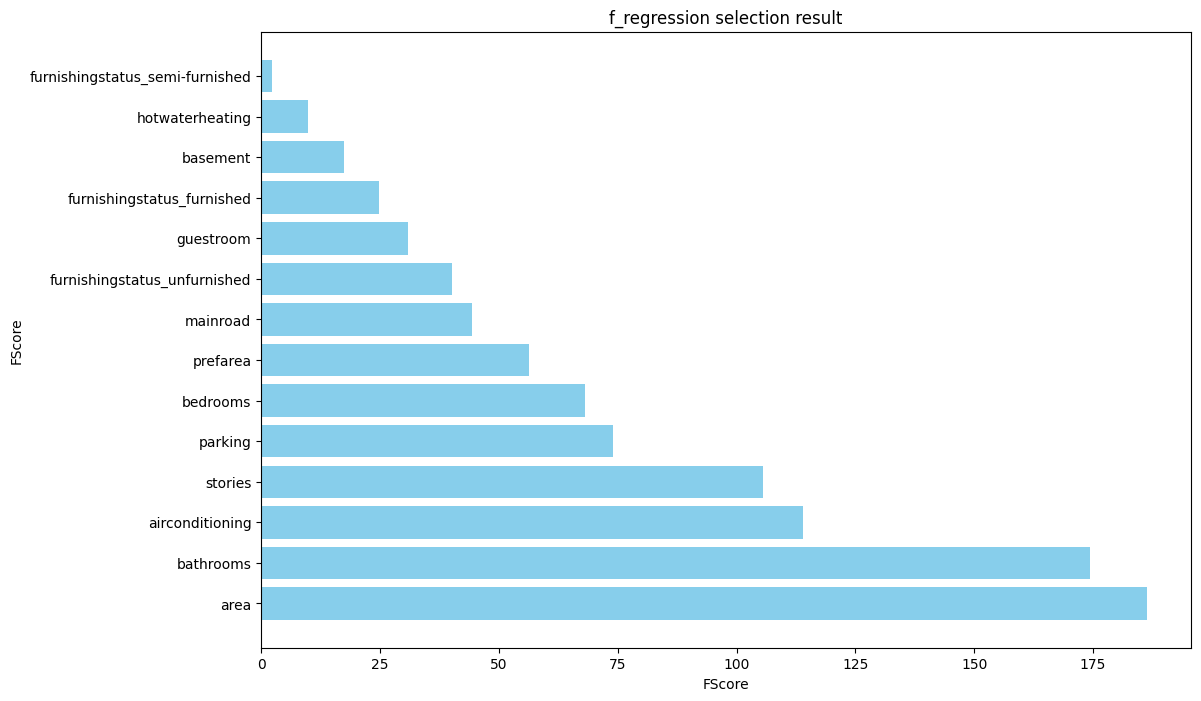

In [21]:
plt.figure(figsize=(12,8))
plt.title('f_regression selection result')
plt.barh(freg_result['Variable'],freg_result['FScore'], color = 'skyblue')
plt.xlabel("FScore")
plt.ylabel('FScore')

### Select variable from high FScore to low FScore.

In [22]:
X_train_new = X_train[['area','bathrooms','airconditioning','stories','parking','bedrooms','prefarea','mainroad','furnishingstatus_unfurnished','guestroom','furnishingstatus_furnished']]
X_test_new = X_test[['area','bathrooms','airconditioning','stories','parking','bedrooms','prefarea','mainroad','furnishingstatus_unfurnished','guestroom','furnishingstatus_furnished']]

### Fitting Model

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_new, y_train)
print(lin_reg.intercept_, " , ", lin_reg.coef_)

193398.4157193089  ,  [ 2.42995347e+02  1.03231709e+06  7.66128338e+05  4.08425919e+05
  2.76823009e+05  1.18533630e+05  6.84474483e+05  4.48180244e+05
 -5.13199706e+05  3.16432275e+05  5.65401049e+02]


### Prediction

In [24]:
price_pred = lin_reg.predict(X_test_new)

### MSE and R2

In [25]:
MSE = mean_squared_error(y_test,price_pred)

print(f"Mean squared error is ${MSE:,.2f}")
print(f'Root mean square is ${MSE**(1/2):,.2f}')

Mean squared error is $1,422,311,539,487.54
Root mean square is $1,192,607.03


In [26]:
r_squared = r2_score(y_test,price_pred)
print(f'R2 = {r_squared}')

R2 = 0.6002756180994882


### Deploy

In [27]:
import pickle

In [29]:
print("Deploy")
pickle.dump(lin_reg, open('model_6610422011.sav','wb') )
from google.colab import files
files.download('model_6610422011.sav')

Deploy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>